In [17]:
import gempy as gp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pyvista as pv
data_path = 'D:\sciebo\geoblk\work-flow\geoblocks-workflow\examples\example_data'

In [18]:
salt_dome = gp.create_model('salt_dome_s32')
gp.init_data(salt_dome, [-2000, 10000., -2000, 10000., 0, 5000.], [50, 50, 50],
             path_o= data_path + "\salt_dome_s32_right\s_32_right_O.csv",
             path_i= data_path + "\salt_dome_s32_right\s_32_right_I.csv",
             default_values=True)

Active grids: ['regular']


salt_dome_s32  2023-02-15 16:42

In [19]:
salt_dome.surfaces

,surface,series,order_surfaces,color,id
0,S 32 right,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


In [20]:
gp.get_data(salt_dome, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,700,2200,3000,-9.993908e-01,9.999388e-13,0.034899,0.01,S 32 right
1,3700,2200,3000,9.781476e-01,1.000060e-12,0.207912,0.01,S 32 right
2,-50,2200,1500,-9.993908e-01,9.999388e-13,0.034899,0.01,S 32 right
3,4800,2200,1500,9.848078e-01,1.000060e-12,0.173648,0.01,S 32 right
4,2200,800,3000,1.000000e-12,-9.848078e-01,0.173648,0.01,S 32 right


In [21]:
gp.map_stack_to_surfaces(salt_dome,
                         {
                          "Strat_Series_1": ('s 32 right'),
                          "Basement":('basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,S 32 right,Default series,1,#015482,1
1,basement,Basement,1,#9f0052,2


In [22]:
salt_dome.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


d:\ict\anaconda\envs\gempy\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
d:\ict\anaconda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


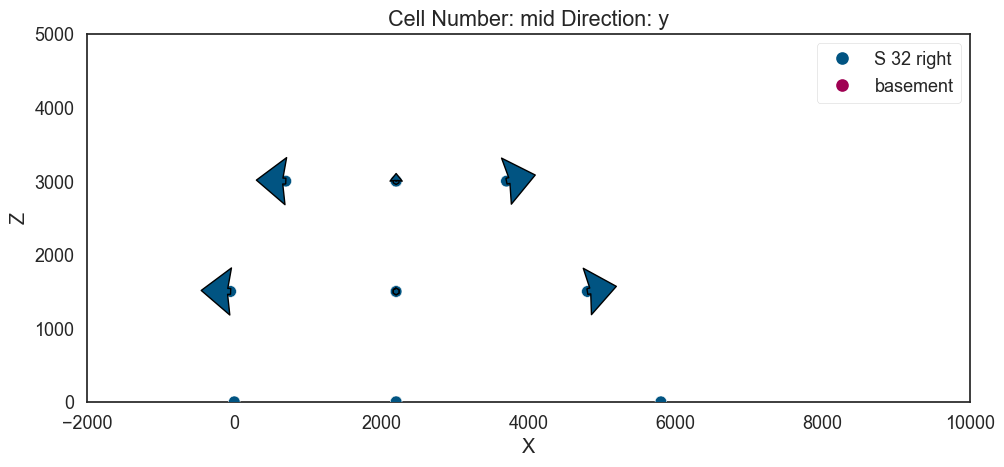

In [23]:
plot = gp.plot_2d(salt_dome, show_lith=False, show_boundaries=False)
plt.show()

d:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:475: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
d:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


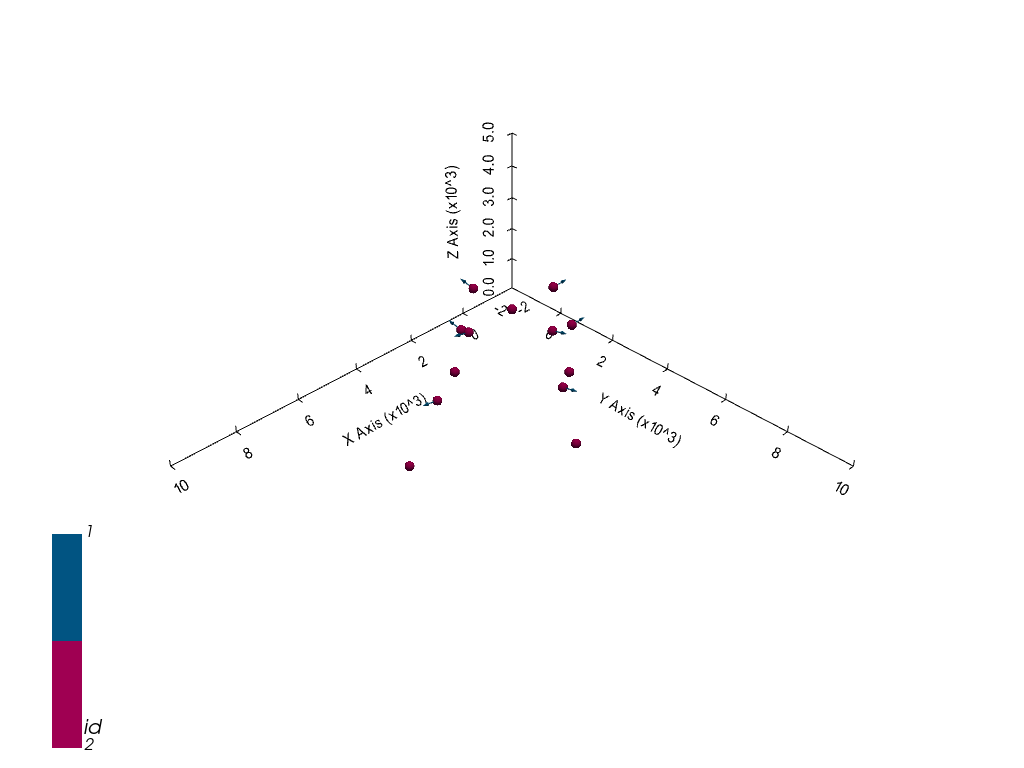

In [24]:
gpv = gp.plot_3d(salt_dome, image=False, plotter_type='basic',notebook=True)

In [25]:
gp.set_interpolator(salt_dome,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              17691.806013
$C_o$            7452380.952381
drift equations          [3, 3]


In [26]:
sol = gp.compute_model(salt_dome)

d:\ict\anaconda\envs\gempy\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
d:\ict\anaconda\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


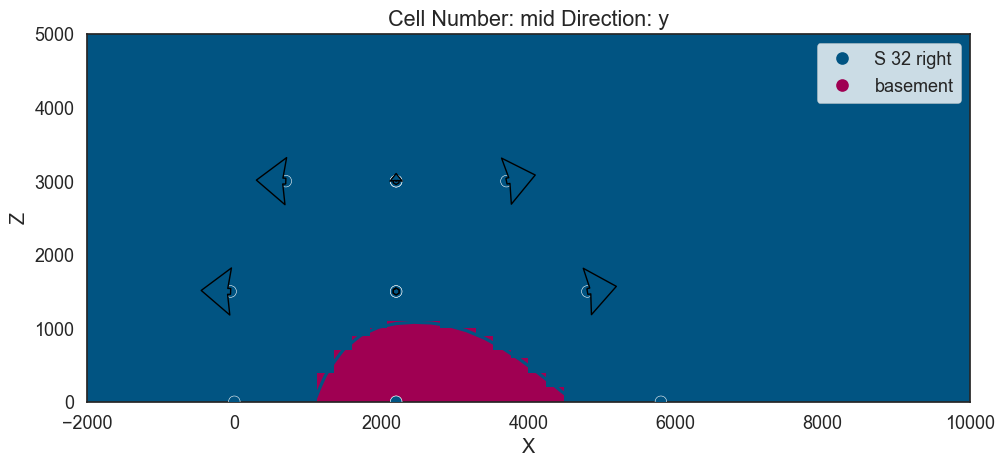

In [27]:
gp.plot_2d(salt_dome, show_data=True)
plt.show()

d:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
d:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:475: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
d:\ict\anaconda\envs\gempy\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


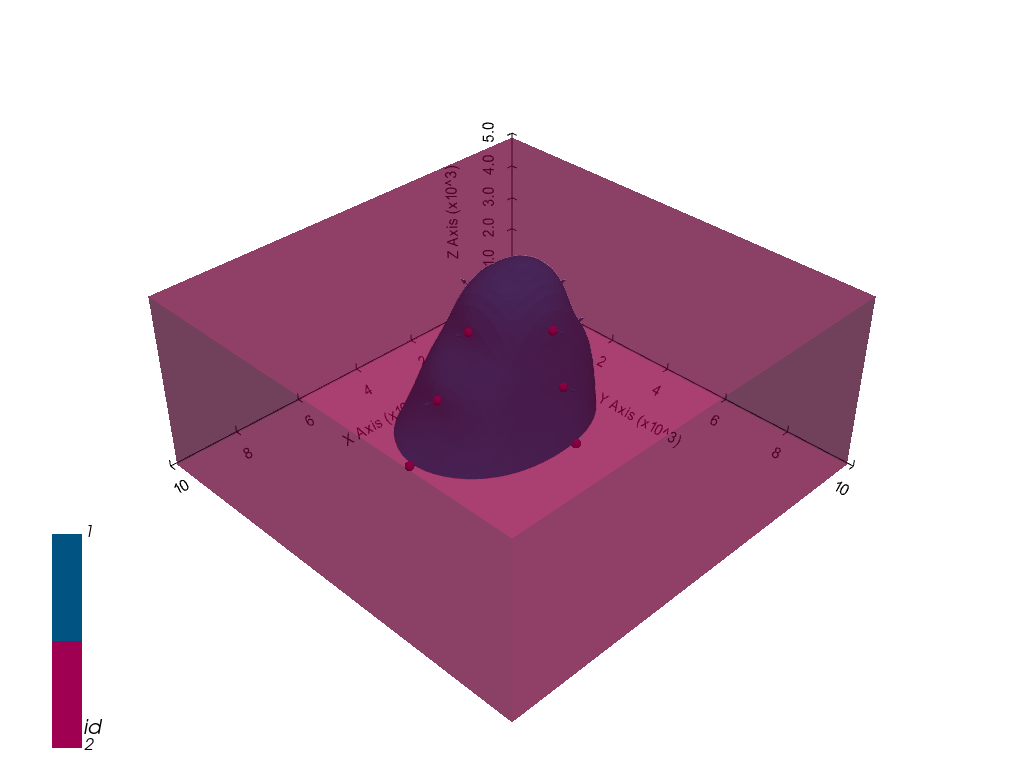

In [28]:
gp.plot_3d(salt_dome,plotter_type='basic',notebook=True)

In [29]:
gp.plot_3d(salt_dome,plotter_type='basic')

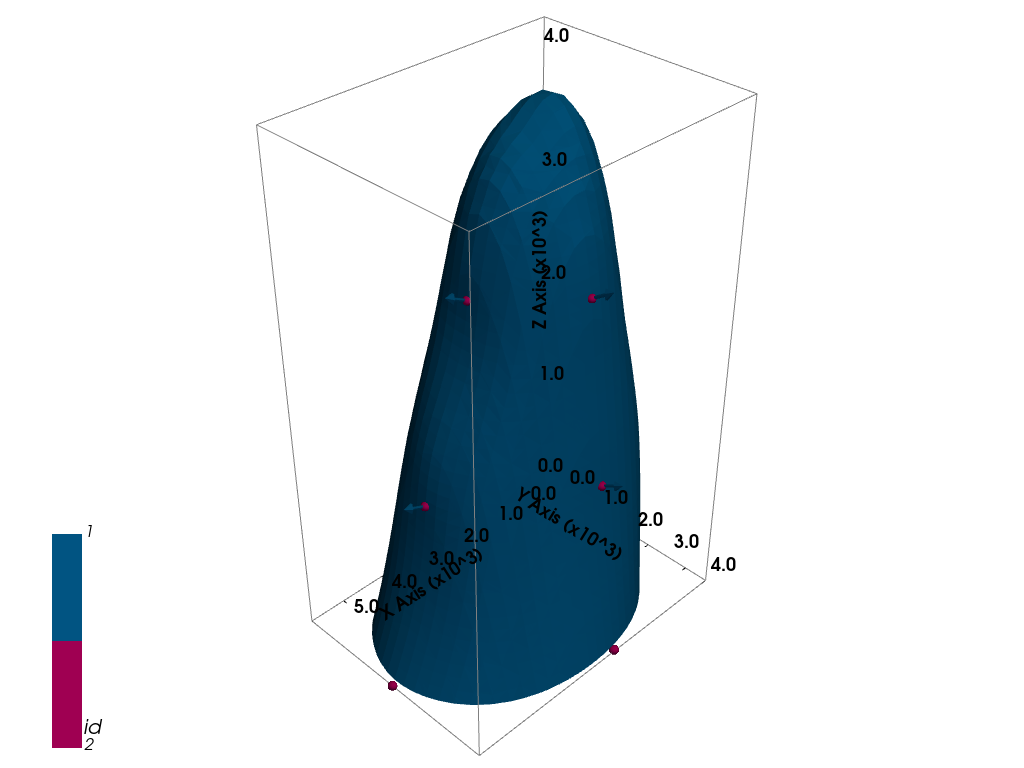

In [30]:
from gempy.plot.vista import GemPyToVista
gpv = GemPyToVista(salt_dome)
gpv.plot_surface_points()
gpv.plot_orientations()
gpv.plot_surfaces()
gpv.p.add_bounding_box()
gpv.p.set_scale(zscale=2.5)
gpv.p.notebook='True'
gpv.p.show()